In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandera as pa
from pandera import Column, DataFrameSchema, Check, Index

from ydata_profiling import ProfileReport

import folium
from folium.plugins import MarkerCluster
import pandas as pd


Important questions are: 

- How do people who use Cyclistic bikes all the time and people who use them sometimes use the bikes differently?
- What are the differences in how casual riders and annual members use Cyclistic bikes?

Clean the Dataset: Apply the appropriate cleaning process to ensure that your dataset is free from errors, inconsistencies, and irrelevant data.

In this dataset we have 4.4% missing values, no duplicates, and the type of each column needs to be defined.
as such, ID's columns are not relevant like ride_id, start_station_id, end_station_id, bike_id, because in the end they are ID's.

In [2]:
df = pd.read_csv('C:\\Users\\midoh\\Desktop\\UST-CSAI\\Y2S2\\DSAI 202 (Governance)\\202207-divvy-tripdata.csv')
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,7/5/2022 8:12,7/5/2022 8:24,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,7/26/2022 12:53,7/26/2022 12:55,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,7/3/2022 13:58,7/3/2022 14:06,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,7/31/2022 17:44,7/31/2022 18:42,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,7/13/2022 19:49,7/13/2022 20:15,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823483,605787F70B3B9FD3,electric_bike,7/9/2022 8:32,7/9/2022 8:56,NaN,NaN,NaN,NaN,41.740000,-87.680000,41.750000,-87.680000,member
823484,F0EECBEE637DF028,electric_bike,7/17/2022 13:27,7/17/2022 13:33,NaN,NaN,NaN,NaN,41.870000,-87.660000,41.870000,-87.680000,member
823485,B8B091DC72DDAB9D,electric_bike,7/17/2022 14:51,7/17/2022 14:57,NaN,NaN,NaN,NaN,41.950000,-87.640000,41.950000,-87.650000,member
823486,B4D3FFCC1F3AF5EC,electric_bike,7/28/2022 13:41,7/28/2022 13:47,NaN,NaN,NaN,NaN,41.880000,-87.630000,41.870000,-87.630000,member


describe

In [3]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,823488.000000,823488.000000,822541.000000,822541.000000
mean,41.904917,-87.647292,41.905166,-87.647417
std,0.043586,0.028390,0.043779,0.028579
min,41.640000,-87.840000,41.620000,-87.920000
25%,41.882830,-87.660995,41.883073,-87.661206
50%,41.902475,-87.643542,41.902973,-87.643948
75%,41.931248,-87.629318,41.931248,-87.629318
max,42.070000,-87.520000,42.370000,-87.520000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823488 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             823488 non-null  object 
 1   rideable_type       823488 non-null  object 
 2   started_at          823488 non-null  object 
 3   ended_at            823488 non-null  object 
 4   start_station_name  711457 non-null  object 
 5   start_station_id    711457 non-null  object 
 6   end_station_name    702537 non-null  object 
 7   end_station_id      702537 non-null  object 
 8   start_lat           823488 non-null  float64
 9   start_lng           823488 non-null  float64
 10  end_lat             822541 non-null  float64
 11  end_lng             822541 non-null  float64
 12  member_casual       823488 non-null  object 
dtypes: float64(4), object(9)
memory usage: 81.7+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
nulls = df.isnull().sum()

In [7]:
cells = np.product(df.shape)
missing = nulls.sum()
missingVals = (missing/cells) * 100
missingVals

4.370321962563744

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [9]:
import pandera as pa
from cerberus import Validator
from pandera import Column, DataFrameSchema, Check, Index, MultiIndex, DateTime

In [10]:
schema = DataFrameSchema({
    "ride_id": Column(str, nullable=False, unique=True),
    "rideable_type": Column(str),
    "started_at": Column(str),
    "ended_at": Column(str),
    "start_station_name": Column(str, unique=True),
    "start_station_id": Column(str, unique=True),
    "end_station_name": Column(str, unique=True),
    "end_station_id": Column(str, unique=True),
    "start_lat": Column(float),
    "start_lng": Column(float),
    "end_lat": Column(float),
    "end_lng": Column(float),
    "member_casual": Column(str),
})

try:
    schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as exc:
    failure_cases_df = exc.failure_cases
    display(exc.failure_cases)

,schema_context,column,check,check_number,failure_case,index
0,Column,ride_id,field_uniqueness,None,7.50E+15,12161
1713671,Column,end_station_name,field_uniqueness,None,LaSalle St & Jackson Blvd,474955
1713664,Column,end_station_name,field_uniqueness,None,Clark St & Lincoln Ave,474948
1713665,Column,end_station_name,field_uniqueness,None,Michigan Ave & 14th St,474949
1713666,Column,end_station_name,field_uniqueness,None,LaSalle St & Jackson Blvd,474950
...,...,...,...,...,...,...
856834,Column,start_station_id,field_uniqueness,None,TA1306000009,236696
856835,Column,start_station_id,field_uniqueness,None,15571,236697
856836,Column,start_station_id,field_uniqueness,None,15571,236698
856837,Column,start_station_id,field_uniqueness,None,KA1503000043,236699


In [11]:
inferred_schema = pa.infer_schema(df).to_script()

with open("Schema.txt", "w") as reader:
  reader.write(inferred_schema)

In [12]:
import pandas as pd
from pandera import DataFrameSchema, Column, Check, Index
from pandas import Timestamp
schema = DataFrameSchema(
    columns={
        "ride_id": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "rideable_type": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "started_at": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ended_at": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "start_station_name": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "start_station_id": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "end_station_name": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "end_station_id": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "start_lat": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=41.6485008),
                Check.less_than_or_equal_to(max_value=42.0648563),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "start_lng": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=-87.83),
                Check.less_than_or_equal_to(max_value=-87.5282317),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "end_lat": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=41.6485008),
                Check.less_than_or_equal_to(max_value=42.064854),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "end_lng": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=-87.83),
                Check.less_than_or_equal_to(max_value=-87.5282317),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "member_casual": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
    },
    checks=None,
    index=Index(
        dtype="int64",
        checks=[
            Check.greater_than_or_equal_to(min_value=0.0),
            Check.less_than_or_equal_to(max_value=823314.0),
        ],
        nullable=False,
        coerce=False,
        name=None,
        description=None,
        title=None,
    ),
    dtype=None,
    coerce=True,
    strict=False,
    name=None,
    ordered=False,
    unique=None,
    report_duplicates="all",
    unique_column_names=False,
    add_missing_columns=False,
    title=None,
    description=None,
)
# Validate DataFrame
validated_df = schema.validate(df)
validated_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,7/5/2022 8:12,7/5/2022 8:24,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,7/26/2022 12:53,7/26/2022 12:55,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,7/3/2022 13:58,7/3/2022 14:06,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,7/31/2022 17:44,7/31/2022 18:42,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,7/13/2022 19:49,7/13/2022 20:15,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822538,6394A34ACAA198A6,electric_bike,7/25/2022 11:21,7/25/2022 11:23,California Ave & Altgeld St,15646,California Ave & Milwaukee Ave,13084,41.926633,-87.697727,41.922695,-87.697153,member
822541,3276F1017BD0CFA6,electric_bike,7/23/2022 12:42,7/23/2022 12:49,California Ave & Altgeld St,15646,California Ave & Division St,13256,41.926623,-87.697759,41.903029,-87.697474,casual
822597,B0FD149163D58D01,classic_bike,7/21/2022 7:28,7/21/2022 7:31,Damen Ave & Grand Ave,TA1308000006,Wood St & Chicago Ave,637,41.892395,-87.676885,41.895634,-87.672069,member
822850,A597A11985C1FEC2,classic_bike,7/10/2022 20:44,7/10/2022 20:45,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual


Summary: the data has =~ 4.4% missing values, no duplicates, the type of each column needs to be defined

changing the type of dates to the correct type

In [13]:
df['started_at'] = pd.to_datetime(df['started_at'])

df['ended_at'] = pd.to_datetime(df['ended_at'])

df = df.sort_values(by='started_at')
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
578862,FDBFB9BD7A38F66D,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913715,-87.652733,41.907626,-87.638566,casual
361889,56C6CCD4EE89184D,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,41.969090,-87.674237,casual
528896,7EA7A3AEAAB5F621,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Waveland Ave,TA1307000126,41.936253,-87.652662,41.949399,-87.654529,casual
578888,C60D39A2484F33FB,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913730,-87.652776,41.907626,-87.638566,member
278812,82D813C75E0708F1,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,Kingsbury St & Erie St,13265,Michigan Ave & Lake St,TA1305000011,41.893808,-87.641697,41.886024,-87.624117,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359852,4EA30C562A5E4627,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,Clark St & Armitage Ave,13146,Wells St & Evergreen Ave,TA1308000049,41.918306,-87.636282,41.906724,-87.634830,casual
189871,A9E5A3BD76BB3588,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,Southport Ave & Roscoe St,13071,Damen Ave & Melrose Ave,13143,41.943739,-87.664020,41.940600,-87.678500,casual
147856,E77BC768DD3C65C4,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,Wood St & 35th St,KA1503000066,Halsted St & 35th St,TA1308000043,41.830123,-87.670314,41.830661,-87.647172,casual
618136,9D9B50749D946176,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,St. Clair St & Erie St,13016,Halsted St & Wrightwood Ave,TA1309000061,41.894345,-87.622798,41.929143,-87.649077,member


adding ride duration column

In [14]:
# in seconds
df['ride_length'] = (
    df['ended_at'] - df['started_at']).dt.total_seconds()
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
578862,FDBFB9BD7A38F66D,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913715,-87.652733,41.907626,-87.638566,casual,420.0
361889,56C6CCD4EE89184D,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,41.969090,-87.674237,casual,1200.0
528896,7EA7A3AEAAB5F621,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Waveland Ave,TA1307000126,41.936253,-87.652662,41.949399,-87.654529,casual,660.0
578888,C60D39A2484F33FB,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913730,-87.652776,41.907626,-87.638566,member,420.0
278812,82D813C75E0708F1,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,Kingsbury St & Erie St,13265,Michigan Ave & Lake St,TA1305000011,41.893808,-87.641697,41.886024,-87.624117,member,660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359852,4EA30C562A5E4627,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,Clark St & Armitage Ave,13146,Wells St & Evergreen Ave,TA1308000049,41.918306,-87.636282,41.906724,-87.634830,casual,300.0
189871,A9E5A3BD76BB3588,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,Southport Ave & Roscoe St,13071,Damen Ave & Melrose Ave,13143,41.943739,-87.664020,41.940600,-87.678500,casual,480.0
147856,E77BC768DD3C65C4,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,Wood St & 35th St,KA1503000066,Halsted St & 35th St,TA1308000043,41.830123,-87.670314,41.830661,-87.647172,casual,420.0
618136,9D9B50749D946176,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,St. Clair St & Erie St,13016,Halsted St & Wrightwood Ave,TA1309000061,41.894345,-87.622798,41.929143,-87.649077,member,1500.0


cleaning the data from the missing values, ride length less than or equal to 0, Removing incomplete rows

In [15]:
df_cleaned = df[df['ride_length'] > 0]

df_cleaned = df_cleaned.dropna(
    subset=['start_station_name', 'end_station_name'])
df_cleaned = df_cleaned[(df_cleaned['start_station_name'] != '') & (
    df_cleaned['end_station_name'] != '')]
df_cleaned

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
578862,FDBFB9BD7A38F66D,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913715,-87.652733,41.907626,-87.638566,casual,420.0
361889,56C6CCD4EE89184D,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,41.969090,-87.674237,casual,1200.0
528896,7EA7A3AEAAB5F621,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Waveland Ave,TA1307000126,41.936253,-87.652662,41.949399,-87.654529,casual,660.0
578888,C60D39A2484F33FB,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913730,-87.652776,41.907626,-87.638566,member,420.0
278812,82D813C75E0708F1,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,Kingsbury St & Erie St,13265,Michigan Ave & Lake St,TA1305000011,41.893808,-87.641697,41.886024,-87.624117,member,660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359852,4EA30C562A5E4627,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,Clark St & Armitage Ave,13146,Wells St & Evergreen Ave,TA1308000049,41.918306,-87.636282,41.906724,-87.634830,casual,300.0
189871,A9E5A3BD76BB3588,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,Southport Ave & Roscoe St,13071,Damen Ave & Melrose Ave,13143,41.943739,-87.664020,41.940600,-87.678500,casual,480.0
147856,E77BC768DD3C65C4,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,Wood St & 35th St,KA1503000066,Halsted St & 35th St,TA1308000043,41.830123,-87.670314,41.830661,-87.647172,casual,420.0
618136,9D9B50749D946176,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,St. Clair St & Erie St,13016,Halsted St & Wrightwood Ave,TA1309000061,41.894345,-87.622798,41.929143,-87.649077,member,1500.0


adding insightfull columns like day of the week, month, and year

In [16]:
import numpy as np
from geopy.distance import geodesic

df_cleaned['year'] = df_cleaned['started_at'].dt.year

df_cleaned['month'] = df_cleaned['started_at'].dt.month_name()

df_cleaned['week'] = df_cleaned['started_at'].dt.strftime("%W")

df_cleaned['day'] = df_cleaned['started_at'].dt.day

df_cleaned['day_of_week'] = df_cleaned['started_at'].dt.day_name()

df_cleaned['ymd'] = df_cleaned['started_at'].dt.strftime("%Y-%m-%d")

df_cleaned['hms'] = df_cleaned['started_at'].dt.strftime("%H:%M:%S")

df_cleaned['ride_distance'] = df_cleaned.apply(
    lambda x: geodesic((x['start_lng'], x['start_lat']),
                       (x['end_lng'], x['end_lat'])).kilometers,
    axis=1
)


df_cleaned['ride_speed in Km/h'] = df_cleaned['ride_distance'] / \
    (df_cleaned['ride_length'] / 3600)
df_cleaned

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_length,year,month,week,day,day_of_week,ymd,hms,ride_distance,ride_speed in Km/h
578862,FDBFB9BD7A38F66D,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913715,-87.652733,...,420.0,2022,July,26,1,Friday,2022-07-01,00:00:00,1.582611,13.565233
361889,56C6CCD4EE89184D,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,...,1200.0,2022,July,26,1,Friday,2022-07-01,00:00:00,1.146954,3.440862
528896,7EA7A3AEAAB5F621,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Waveland Ave,TA1307000126,41.936253,-87.652662,...,660.0,2022,July,26,1,Friday,2022-07-01,00:00:00,0.217010,1.183689
578888,C60D39A2484F33FB,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,Sheffield Ave & Willow St,TA1306000032,Sedgwick St & Schiller St,TA1307000143,41.913730,-87.652776,...,420.0,2022,July,26,1,Friday,2022-07-01,00:00:00,1.587336,13.605734
278812,82D813C75E0708F1,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,Kingsbury St & Erie St,13265,Michigan Ave & Lake St,TA1305000011,41.893808,-87.641697,...,660.0,2022,July,26,1,Friday,2022-07-01,00:01:00,1.963897,10.712165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359852,4EA30C562A5E4627,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,Clark St & Armitage Ave,13146,Wells St & Evergreen Ave,TA1308000049,41.918306,-87.636282,...,300.0,2022,July,30,31,Sunday,2022-07-31,23:58:00,0.170733,2.048792
189871,A9E5A3BD76BB3588,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,Southport Ave & Roscoe St,13071,Damen Ave & Melrose Ave,13143,41.943739,-87.664020,...,480.0,2022,July,30,31,Sunday,2022-07-31,23:58:00,1.617365,12.130234
147856,E77BC768DD3C65C4,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,Wood St & 35th St,KA1503000066,Halsted St & 35th St,TA1308000043,41.830123,-87.670314,...,420.0,2022,July,30,31,Sunday,2022-07-31,23:58:00,2.584802,22.155445
618136,9D9B50749D946176,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,St. Clair St & Erie St,13016,Halsted St & Wrightwood Ave,TA1309000061,41.894345,-87.622798,...,1500.0,2022,July,30,31,Sunday,2022-07-31,23:59:00,2.939486,7.054767


We need to frop unnecessary columns like ride_id, start_station_id, end_station_id, bike_id

In [17]:
columns_to_drop = ['start_station_name', 'start_station_id',
                   'end_station_name', 'end_station_id']
df_cleaned = df_cleaned.drop(columns=columns_to_drop).reset_index(drop=True)
df_cleaned

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,week,day,day_of_week,ymd,hms,ride_distance,ride_speed in Km/h
0,FDBFB9BD7A38F66D,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,41.913715,-87.652733,41.907626,-87.638566,casual,420.0,2022,July,26,1,Friday,2022-07-01,00:00:00,1.582611,13.565233
1,56C6CCD4EE89184D,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,41.943739,-87.664020,41.969090,-87.674237,casual,1200.0,2022,July,26,1,Friday,2022-07-01,00:00:00,1.146954,3.440862
2,7EA7A3AEAAB5F621,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,41.936253,-87.652662,41.949399,-87.654529,casual,660.0,2022,July,26,1,Friday,2022-07-01,00:00:00,0.217010,1.183689
3,C60D39A2484F33FB,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,41.913730,-87.652776,41.907626,-87.638566,member,420.0,2022,July,26,1,Friday,2022-07-01,00:00:00,1.587336,13.605734
4,82D813C75E0708F1,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,41.893808,-87.641697,41.886024,-87.624117,member,660.0,2022,July,26,1,Friday,2022-07-01,00:01:00,1.963897,10.712165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635890,4EA30C562A5E4627,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,41.918306,-87.636282,41.906724,-87.634830,casual,300.0,2022,July,30,31,Sunday,2022-07-31,23:58:00,0.170733,2.048792
635891,A9E5A3BD76BB3588,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,41.943739,-87.664020,41.940600,-87.678500,casual,480.0,2022,July,30,31,Sunday,2022-07-31,23:58:00,1.617365,12.130234
635892,E77BC768DD3C65C4,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,41.830123,-87.670314,41.830661,-87.647172,casual,420.0,2022,July,30,31,Sunday,2022-07-31,23:58:00,2.584802,22.155445
635893,9D9B50749D946176,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,41.894345,-87.622798,41.929143,-87.649077,member,1500.0,2022,July,30,31,Sunday,2022-07-31,23:59:00,2.939486,7.054767



  Process the coordinates table by filtering out rows where the start and end coordinates are the same,
  grouping the remaining rows by various columns, and filtering out rows with a total count less than zero.

  Args:
    df_cleaned (pandas.DataFrame): The cleaned dataframe containing the coordinates data.

  Returns:
    pandas.DataFrame: The processed coordinates table.


In [18]:
coordinates_table = df_cleaned[(df_cleaned['start_lng'] != df_cleaned['end_lng']) & (
    df_cleaned['start_lat'] != df_cleaned['end_lat'])]

coordinates_table = coordinates_table.groupby(
    ['start_lng', 'start_lat', 'end_lng', 'end_lat', 'member_casual', 'rideable_type']).size().reset_index(name='total')

coordinates_table = coordinates_table[coordinates_table['total'] >= 0]
coordinates_table

,start_lng,start_lat,end_lng,end_lat,member_casual,rideable_type,total
0,-87.830000,41.940000,-87.810000,41.950000,member,electric_bike,1
1,-87.830000,41.950000,-87.820000,41.940000,casual,electric_bike,1
2,-87.830000,41.950000,-87.760000,41.930000,member,electric_bike,2
3,-87.820000,41.940000,-87.830000,41.950000,casual,electric_bike,1
4,-87.820000,41.940000,-87.810000,41.950000,member,electric_bike,4
...,...,...,...,...,...,...,...
330950,-87.528232,41.704575,-87.549700,41.728204,casual,classic_bike,5
330951,-87.528232,41.704575,-87.537931,41.681002,casual,classic_bike,1
330952,-87.528232,41.704575,-87.537931,41.681002,member,classic_bike,3
330953,-87.528232,41.704575,-87.530431,41.691774,casual,classic_bike,6


In [19]:
member = coordinates_table[coordinates_table['member_casual'] == 'member']
member

,start_lng,start_lat,end_lng,end_lat,member_casual,rideable_type,total
0,-87.830000,41.940000,-87.810000,41.950000,member,electric_bike,1
2,-87.830000,41.950000,-87.760000,41.930000,member,electric_bike,2
4,-87.820000,41.940000,-87.810000,41.950000,member,electric_bike,4
5,-87.820000,41.940000,-87.790000,41.950000,member,electric_bike,1
7,-87.820000,41.940000,-87.700000,41.950000,member,electric_bike,1
...,...,...,...,...,...,...,...
330938,-87.530000,41.700000,-87.530431,41.691774,member,electric_bike,1
330948,-87.528366,41.704640,-87.567514,41.773643,member,electric_bike,1
330949,-87.528232,41.704575,-87.587782,41.793242,member,classic_bike,1
330952,-87.528232,41.704575,-87.537931,41.681002,member,classic_bike,3


In [20]:
with open('member_coordinates.csv', 'wb') as f:
    f.write(member.to_csv(index=False).encode())

In [21]:
casual = coordinates_table[coordinates_table['member_casual'] == 'casual']
casual

,start_lng,start_lat,end_lng,end_lat,member_casual,rideable_type,total
1,-87.830000,41.950000,-87.820000,41.940000,casual,electric_bike,1
3,-87.820000,41.940000,-87.830000,41.950000,casual,electric_bike,1
6,-87.820000,41.940000,-87.728970,41.961108,casual,electric_bike,1
8,-87.820000,41.950000,-87.749594,41.954468,casual,electric_bike,1
9,-87.810000,41.910000,-87.800000,41.930000,casual,electric_bike,1
...,...,...,...,...,...,...,...
330946,-87.528390,41.704562,-87.528232,41.704575,casual,electric_bike,1
330947,-87.528383,41.704627,-87.528232,41.704575,casual,electric_bike,1
330950,-87.528232,41.704575,-87.549700,41.728204,casual,classic_bike,5
330951,-87.528232,41.704575,-87.537931,41.681002,casual,classic_bike,1


In [22]:
with open('casual_coordinates.csv', 'wb') as f:
    f.write(casual.to_csv(index=False).encode())


  Calculate the most preferable time for trips based on the given cleaned dataframe.

  Parameters:
  df_cleaned (pandas.DataFrame): The cleaned dataframe containing the trip data.

  Returns:
  pandas.DataFrame: A dataframe with the most preferable time for trips, grouped by hour and member type.


In [23]:
import numpy as np

df_cleaned['ToD_convert'] = pd.to_datetime(
    df_cleaned['hms'], format='%H:%M:%S')

df_cleaned['by60'] = pd.cut(df_cleaned['ToD_convert'], bins=pd.date_range(
    start='00:00:00', end='23:59:59', freq='60T'))

most_preferable_time = df_cleaned.groupby(
    ['by60', 'member_casual']).size().reset_index(name='numtrips')
most_preferable_time['numtrips_0000s'] = most_preferable_time['numtrips'] / 1000
most_preferable_time = most_preferable_time.drop(columns='numtrips')
most_preferable_time

C:\Users\midoh\AppData\Local\Temp\ipykernel_22252\2568086058.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_cleaned['by60'] = pd.cut(df_cleaned['ToD_convert'], bins=pd.date_range(
C:\Users\midoh\AppData\Local\Temp\ipykernel_22252\2568086058.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_preferable_time = df_cleaned.groupby(


,by60,member_casual,numtrips_0000s
0,"(2024-05-14 00:00:00, 2024-05-14 01:00:00]",casual,0.0
1,"(2024-05-14 00:00:00, 2024-05-14 01:00:00]",member,0.0
2,"(2024-05-14 01:00:00, 2024-05-14 02:00:00]",casual,0.0
3,"(2024-05-14 01:00:00, 2024-05-14 02:00:00]",member,0.0
4,"(2024-05-14 02:00:00, 2024-05-14 03:00:00]",casual,0.0
5,"(2024-05-14 02:00:00, 2024-05-14 03:00:00]",member,0.0
6,"(2024-05-14 03:00:00, 2024-05-14 04:00:00]",casual,0.0
7,"(2024-05-14 03:00:00, 2024-05-14 04:00:00]",member,0.0
8,"(2024-05-14 04:00:00, 2024-05-14 05:00:00]",casual,0.0
9,"(2024-05-14 04:00:00, 2024-05-14 05:00:00]",member,0.0


In [24]:
HeatMap_vizu = df_cleaned[['ymd', 'month', 'week',
                           'day_of_week', 'member_casual', 'rideable_type']]

HeatMap_vizu = HeatMap_vizu.groupby(
    ['rideable_type', 'member_casual', 'ymd']).size().reset_index(name='num_trips')

HeatMap_vizu = HeatMap_vizu.drop_duplicates(subset=['ymd', 'member_casual'])

HeatMap_vizu

,rideable_type,member_casual,ymd,num_trips
0,classic_bike,casual,2022-07-01,4301
1,classic_bike,casual,2022-07-02,8724
2,classic_bike,casual,2022-07-03,7657
3,classic_bike,casual,2022-07-04,5480
4,classic_bike,casual,2022-07-05,3221
...,...,...,...,...
57,classic_bike,member,2022-07-27,7380
58,classic_bike,member,2022-07-28,7717
59,classic_bike,member,2022-07-29,7423
60,classic_bike,member,2022-07-30,7414


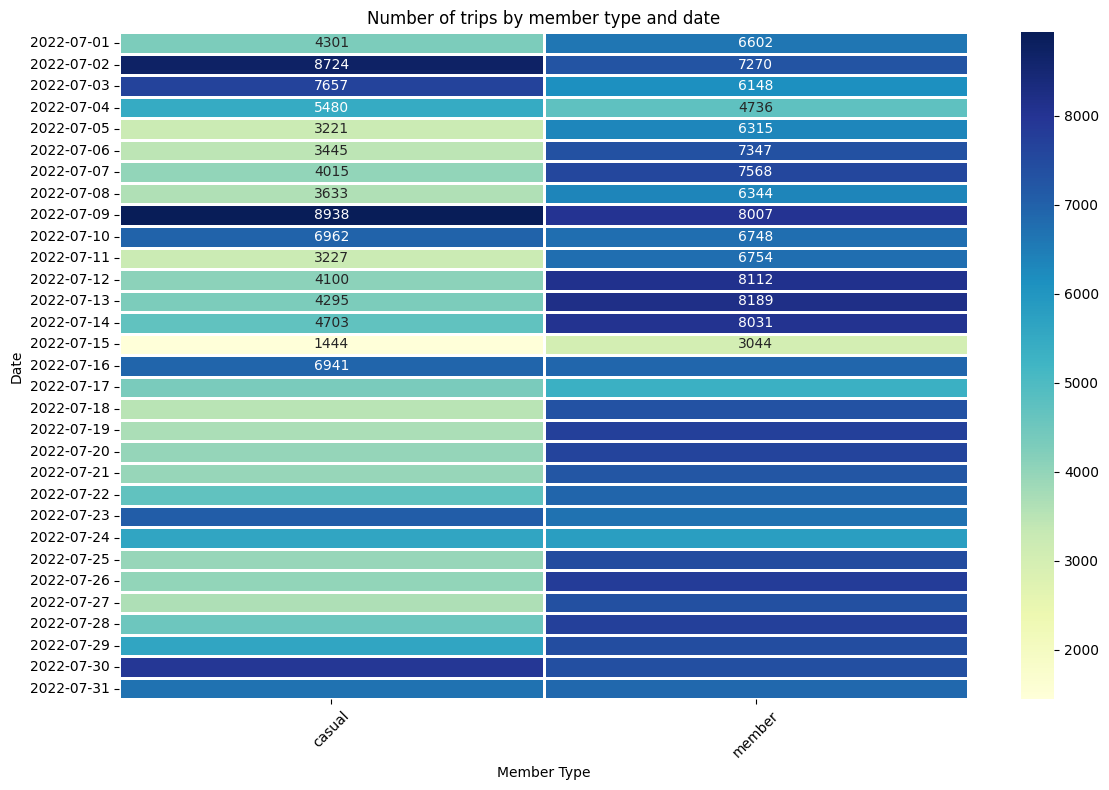

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = HeatMap_vizu.pivot(
    index='ymd', columns='member_casual', values='num_trips')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linecolor='white',
            linewidths=1, annot=True, fmt='d')
plt.title('Number of trips by member type and date')
plt.xlabel('Member Type')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
inferred_schema = pa.infer_schema(df_cleaned).to_script()

with open("Schema_cleaned.txt", "w") as reader:
  reader.write(inferred_schema)

In [28]:
import pandas as pd
from pandera import DataFrameSchema, Column, Check, Index
from pandas import Timestamp
from pandas import Timestamp

schema_cleaned = DataFrameSchema(
    columns={
        "ride_id": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "rideable_type": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "started_at": Column(
            dtype="datetime64[ns]",
            checks=[
                Check.greater_than_or_equal_to(
                    min_value=Timestamp("2022-07-01 00:00:00")
                ),
                Check.less_than_or_equal_to(
                    max_value=Timestamp("2022-07-31 23:59:00")
                ),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ended_at": Column(
            dtype="datetime64[ns]",
            checks=[
                Check.greater_than_or_equal_to(
                    min_value=Timestamp("2022-07-01 00:06:00")
                ),
                Check.less_than_or_equal_to(
                    max_value=Timestamp("2022-08-01 13:26:00")
                ),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "start_lat": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=41.6485008),
                Check.less_than_or_equal_to(max_value=42.0648563),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "start_lng": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=-87.83),
                Check.less_than_or_equal_to(max_value=-87.5282317),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "end_lat": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=41.6485008),
                Check.less_than_or_equal_to(max_value=42.064854),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "end_lng": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=-87.83),
                Check.less_than_or_equal_to(max_value=-87.5282317),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "member_casual": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ride_length": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=60.0),
                Check.less_than_or_equal_to(max_value=1922100.0),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "year": Column(
            dtype="int32",
            checks=[
                Check.greater_than_or_equal_to(min_value=2022.0),
                Check.less_than_or_equal_to(max_value=2022.0),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "month": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "week": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "day": Column(
            dtype="int32",
            checks=[
                Check.greater_than_or_equal_to(min_value=1.0),
                Check.less_than_or_equal_to(max_value=31.0),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "day_of_week": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ymd": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "hms": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ride_distance": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=0.0),
                Check.less_than_or_equal_to(max_value=20.524275650006064),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ride_speed in Km/h": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=0.0),
                Check.less_than_or_equal_to(max_value=535.6713618898508),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "ToD_convert": Column(
            dtype="datetime64[ns]",
            checks=[
                Check.greater_than_or_equal_to(
                    min_value=Timestamp("1900-01-01 00:00:00")
                ),
                Check.less_than_or_equal_to(
                    max_value=Timestamp("1900-01-01 23:59:00")
                ),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "by60": Column(
            dtype="category",
            checks=None,
            nullable=True,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
    },
    checks=None,
    index=Index(
        dtype="int64",
        checks=[
            Check.greater_than_or_equal_to(min_value=0.0),
            Check.less_than_or_equal_to(max_value=635894.0),
        ],
        nullable=False,
        coerce=False,
        name=None,
        description=None,
        title=None,
    ),
    dtype=None,
    coerce=True,
    strict=False,
    name=None,
    ordered=False,
    unique=None,
    report_duplicates="all",
    unique_column_names=False,
    add_missing_columns=False,
    title=None,
    description=None,
)

# Validate DataFrame
validated_df_cleaned = schema_cleaned.validate(df_cleaned)
validated_df_cleaned

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,...,month,week,day,day_of_week,ymd,hms,ride_distance,ride_speed in Km/h,ToD_convert,by60
0,FDBFB9BD7A38F66D,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,41.913715,-87.652733,41.907626,-87.638566,casual,420.0,...,July,26,1,Friday,2022-07-01,00:00:00,1.582611,13.565233,1900-01-01 00:00:00,NaN
1,56C6CCD4EE89184D,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,41.943739,-87.664020,41.969090,-87.674237,casual,1200.0,...,July,26,1,Friday,2022-07-01,00:00:00,1.146954,3.440862,1900-01-01 00:00:00,NaN
2,7EA7A3AEAAB5F621,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,41.936253,-87.652662,41.949399,-87.654529,casual,660.0,...,July,26,1,Friday,2022-07-01,00:00:00,0.217010,1.183689,1900-01-01 00:00:00,NaN
3,C60D39A2484F33FB,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,41.913730,-87.652776,41.907626,-87.638566,member,420.0,...,July,26,1,Friday,2022-07-01,00:00:00,1.587336,13.605734,1900-01-01 00:00:00,NaN
4,82D813C75E0708F1,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,41.893808,-87.641697,41.886024,-87.624117,member,660.0,...,July,26,1,Friday,2022-07-01,00:01:00,1.963897,10.712165,1900-01-01 00:01:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635890,4EA30C562A5E4627,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,41.918306,-87.636282,41.906724,-87.634830,casual,300.0,...,July,30,31,Sunday,2022-07-31,23:58:00,0.170733,2.048792,1900-01-01 23:58:00,NaN
635891,A9E5A3BD76BB3588,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,41.943739,-87.664020,41.940600,-87.678500,casual,480.0,...,July,30,31,Sunday,2022-07-31,23:58:00,1.617365,12.130234,1900-01-01 23:58:00,NaN
635892,E77BC768DD3C65C4,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,41.830123,-87.670314,41.830661,-87.647172,casual,420.0,...,July,30,31,Sunday,2022-07-31,23:58:00,2.584802,22.155445,1900-01-01 23:58:00,NaN
635893,9D9B50749D946176,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,41.894345,-87.622798,41.929143,-87.649077,member,1500.0,...,July,30,31,Sunday,2022-07-31,23:59:00,2.939486,7.054767,1900-01-01 23:59:00,NaN


In [29]:
with open('C:\\Users\\midoh\\Desktop\\UST-CSAI\\Y2S2\\DSAI 202 (Governance)\\cleaned_dataSet.csv', 'wb') as file:
    df_cleaned.to_csv(file, index=False)
    

In [30]:
from cryptography.fernet import Fernet
from nltk.tokenize import word_tokenize
from faker import Faker
from anonymizedf.anonymizedf import anonymize
import random
import numpy as np
import nltk
import hashlib
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\midoh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
def scramble_data(data):
    data_list = list(data)
    random.shuffle(data_list)
    return ''.join(data_list)


def tokenize_data(data): return word_tokenize(data)

In [32]:
df_cleaned_secret = df_cleaned.copy()

In [33]:
an = anonymize(df_cleaned_secret)
faker = Faker()
key = Fernet.generate_key()
cipher = Fernet(key)

In [34]:
# Mask sensitive columns
df_cleaned_secret['ride_id'] = [faker.uuid4() for _ in range(len(df_cleaned))]
df_cleaned_secret['start_lat'] = [faker.latitude()
                                  for _ in range(len(df_cleaned))]
df_cleaned_secret['start_lng'] = [faker.longitude()
                                  for _ in range(len(df_cleaned))]
df_cleaned_secret['end_lat'] = [faker.latitude()
                                for _ in range(len(df_cleaned))]
df_cleaned_secret['end_lng'] = [faker.longitude()
                                for _ in range(len(df_cleaned))]

In [35]:
df_cleaned_secret

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,...,month,week,day,day_of_week,ymd,hms,ride_distance,ride_speed in Km/h,ToD_convert,by60
0,4ee1c15a-f450-4572-949b-317a6fb86781,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,-39.007681,-31.408931,16.2742265,-79.262693,casual,420.0,...,July,26,1,Friday,2022-07-01,00:00:00,1.582611,13.565233,1900-01-01 00:00:00,NaN
1,a57a6ac4-5ad1-4e52-8e7a-24fe94329caf,classic_bike,2022-07-01 00:00:00,2022-07-01 00:20:00,37.3978755,134.014714,32.2402085,47.352844,casual,1200.0,...,July,26,1,Friday,2022-07-01,00:00:00,1.146954,3.440862,1900-01-01 00:00:00,NaN
2,a8e14eda-5ed3-4559-895c-01f2b479290e,classic_bike,2022-07-01 00:00:00,2022-07-01 00:11:00,33.9776015,-41.234298,-61.537081,-91.082146,casual,660.0,...,July,26,1,Friday,2022-07-01,00:00:00,0.217010,1.183689,1900-01-01 00:00:00,NaN
3,4302565a-e91f-4887-9c26-c0dce154c174,electric_bike,2022-07-01 00:00:00,2022-07-01 00:07:00,-72.8462375,47.215054,67.3807365,98.029836,member,420.0,...,July,26,1,Friday,2022-07-01,00:00:00,1.587336,13.605734,1900-01-01 00:00:00,NaN
4,3819f73f-7439-4dfe-877b-455898c6e616,classic_bike,2022-07-01 00:01:00,2022-07-01 00:12:00,-52.7813855,-70.656911,-58.0254465,-20.572989,member,660.0,...,July,26,1,Friday,2022-07-01,00:01:00,1.963897,10.712165,1900-01-01 00:01:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635890,8eadc249-cfa7-44e9-a334-23fc289e34df,classic_bike,2022-07-31 23:58:00,2022-08-01 00:03:00,-61.493896,-16.313434,88.4246905,19.396507,casual,300.0,...,July,30,31,Sunday,2022-07-31,23:58:00,0.170733,2.048792,1900-01-01 23:58:00,NaN
635891,8a4212c8-26b0-4508-9cfc-e9f52f1693f0,docked_bike,2022-07-31 23:58:00,2022-08-01 00:06:00,-52.746564,70.570729,-81.9741865,147.582692,casual,480.0,...,July,30,31,Sunday,2022-07-31,23:58:00,1.617365,12.130234,1900-01-01 23:58:00,NaN
635892,125a051c-ff73-4cc0-af5a-2c48c3da59fc,electric_bike,2022-07-31 23:58:00,2022-08-01 00:05:00,45.270539,-178.837898,-23.009682,138.867162,casual,420.0,...,July,30,31,Sunday,2022-07-31,23:58:00,2.584802,22.155445,1900-01-01 23:58:00,NaN
635893,e8c90887-3691-4c4f-a7ab-49e390d6908e,classic_bike,2022-07-31 23:59:00,2022-08-01 00:24:00,52.133882,39.880370,59.5157855,-161.093164,member,1500.0,...,July,30,31,Sunday,2022-07-31,23:59:00,2.939486,7.054767,1900-01-01 23:59:00,NaN


In [36]:
with open('C:\\Users\\midoh\\Desktop\\UST-CSAI\\Y2S2\\DSAI 202 (Governance)\\cleaned_dataSet_secret.csv', 'wb') as file:
    df_cleaned_secret.to_csv(file, index=False)

In [37]:
# This is a built-in function to profile columns in the dataframe, it will take a while to run, around 3 to 5 minutes
# import pandas as pd

# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("output.html")

In [38]:
# df2 = pd.concat([df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng']], axis=1)
# df2 = df2.head(100)

# map_center = [df2[['start_lat', 'end_lat']].values.mean(), df2[['start_lng', 'end_lng']].values.mean()]
# mymap = folium.Map(location=map_center, zoom_start=10)

# marker_cluster = MarkerCluster().add_to(mymap)

# for index, row in df2.iterrows():
#     folium.Marker(location=[row['start_lat'], row['start_lng']], popup='Start', icon=folium.Icon(color='green')).add_to(marker_cluster)
#     folium.Marker(location=[row['end_lat'], row['end_lng']], popup='End', icon=folium.Icon(color='red')).add_to(marker_cluster)

# mymap.save('map.html')
# mymap
